In [168]:
import numpy as np
import math as mt
from math import pi
from math import atan2
from roboticstoolbox import *
from spatialmath.base import *
np.set_printoptions(suppress=True)
l = np.array([14.4, 10.47 ,10.55, 7.35]) #5 #l[4]=20 con marcador
#l = np.array([14.4, 10.47 ,10.55, 20]) #5 #l[4]=20 con marcador
#l = np.array([15.5, 10.68 ,10.54, 20])
#l=np.array([13.4,10.5, 10.5,10.5]) #1
#Ctrl+/ para comentar
def MTHDH(a,alpha,d,theta):
    ct=np.cos(theta)
    st=np.sin(theta)
    ca=np.cos(alpha)
    sa=np.sin(alpha)
    mth=np.array([[ct,-st*ca,st*sa,a*ct],
                 [st,ct*ca,-ct*sa,a*st],
                 [0,sa,ca,d],
                 [0,0,0,1]])
    return mth
def invMTH(mth):
    r10=mth[0:3,0:3]
    d10=mth[0:3,3]
    r01=np.transpose(r10)
    d01=(np.matmul(-r01,d10))
    d01=np.array([  [d01[0]],
                    [d01[1]],
                    [d01[2]]])
    inv=np.concatenate((r01,d01),axis=1)
    inv=np.concatenate((inv,np.transpose(np.array([[0],[0],[0],[1]]))),axis=0)                
    return inv

In [177]:
pose=np.asanyarray(transl(8,8.73,6.8) @ trotx(95,'deg'))
pose

array([[ 1.        ,  0.        ,  0.        ,  8.        ],
       [ 0.        , -0.08715574, -0.9961947 ,  8.73      ],
       [ 0.        ,  0.9961947 , -0.08715574,  6.8       ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [178]:
dt=pose[0:3,3] #distancia tcp
#xt=pose[0,3]   #
#yt=pose[1,3]
#zt=pose[2,3]
approach=pose[0:3,2]
theta1=mt.atan2(dt[1],dt[0])
if abs(theta1)>pi/2:
    theta1 = atan2(-dt[1],-dt[0])
w=dt-l[3]*approach
xtr=np.sqrt(w[0]**2+w[1]**2)
ztr=w[2]-l[0]
ctheta3=((xtr**2+ztr**2-l[1]**2-l[2]**2)/(2*l[1]*l[2]))
stheta3=mt.sqrt(1-ctheta3**2)
theta3=atan2((stheta3),ctheta3)
alpha=atan2(-ztr,xtr)
beta=atan2(-l[2]*mt.sin(abs(theta3)),l[1]+l[2]*mt.cos(abs(theta3)))
theta2=alpha+beta+pi/2
phi = atan2(pose[2,2], mt.sqrt(pose[0,2]**2 +pose[1,2]**2)) - pi/2
theta4=(phi-theta2-theta3)%pi
if theta4>=pi/2:
    theta4=theta4-pi
elif theta4<=-pi/2:
    theta4=theta4+pi

q=np.array([theta1,-theta2,-theta3,-theta4])
q


array([ 0.82900469, -1.52453223, -0.82947176,  0.87047413])

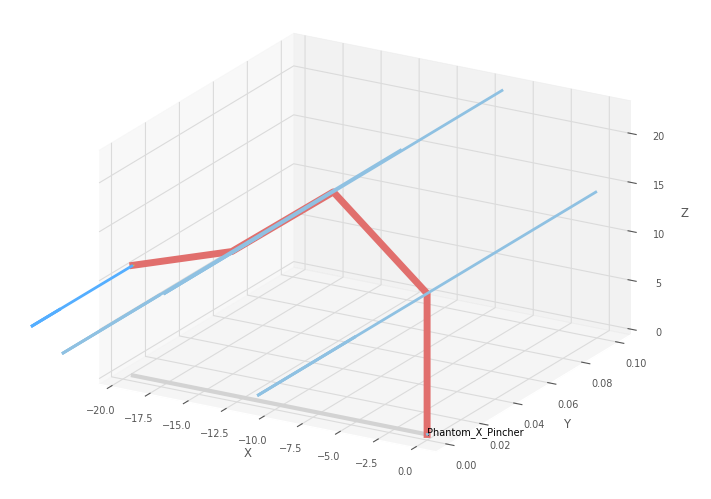

array([[ -0.88417731,   0.46715146,   0.        , -19.33473268],
       [ -0.        ,  -0.        ,  -1.        ,  -0.        ],
       [ -0.46715146,  -0.88417731,   0.        ,  11.25806687],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

<Figure size 640x480 with 0 Axes>

In [171]:
pincher = DHRobot(
    [
        RevoluteDH(alpha=pi/2,d=l[0]),
        RevoluteDH(a=l[1],offset=pi/2),
        RevoluteDH(a=l[2]),
        RevoluteDH(a=l[3])
    ], name="Phantom_X_Pincher")

qtest=[-0,  0.62943155,  1.82743112,  -0.4]

sol=np.asanyarray(pincher.fkine(qtest))
#l = np.array([14.5, 10.63, 10.65, 8.97])
#sol=pincher.ikine_global(pose)
pincher.plot(qtest)
sol


In [172]:
#pose=np.asanyarray(transl(-5,0,25) @ trotx(-90,'deg'))

#Retiro herramienta
# pose=np.array([[1,0,0,-12+7.66],
#                [0,0.766,-0.6428,0],
#                [0,0.6428,0.766,18.5+6.5],
#                [0,0,0,1]])
#Escritura
#pose=np.array([[-1,0,0,18.5],
#                [0,-1,0,0], 
#                [0,0,-1,15.4],
#                [0,0,0,1]])